# ML Advance Project - GCD

### Dataset : Letter Recognition

- Submitted by __Shalini Bardhan__

## Table of Content:

1. <a href='#section1'>Problem Statement</a>

2. <a href='#section2'>Data Loading and Description</a>

3. <a href='#section3'>Exploratory Data Analysis</a>

4. [Model Training](#Section4)

5. [Test Dataset Predictions](#Section5)

6. [Conclusion](#lastsection)

## 1. Problem Statement

Our objective is to identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet through the help of Machine Learning models or algorithms. 


## 2. Data Loading and Description

The character images are based on 20 different fonts and each letter within these 20 fonts are randomly distorted to produce a file of 20,000 unique stimuli. Each stimulus is converted into 16 primitive numerical attributes ( statistical moments and edge counts ) which are then scaled to fit into a range of integer values from 0 through 15. 
We typically train on the first 16000 items and then use the resulting model to predict the letter category for the remaining 4000. 

__Attribute Information:__

 
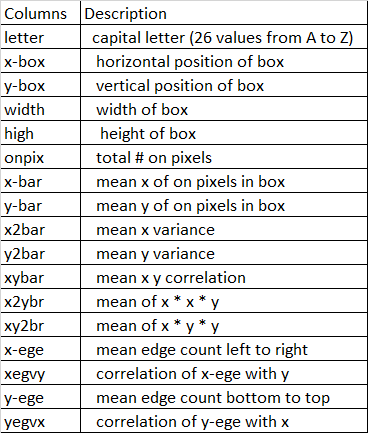

__Importing Packages__

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt 
%matplotlib inline   
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

__Importing the dataset__

In [6]:
df_train  =  pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-4/master/Projects/LetterRecognition_train.csv')
df_train.head()

,letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,id
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10,1
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9,2
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8,3
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10,4
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7,5


In [7]:
df_test = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-4/master/Projects/LetterRecognition_test.csv')
df_test.head()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,id
0,6,9,8,4,3,8,7,3,4,13,5,8,6,8,0,8,16001
1,6,9,8,8,10,7,7,5,4,7,6,8,7,9,7,10,16002
2,5,6,6,4,3,7,6,2,7,7,6,9,0,9,4,8,16003
3,5,9,7,6,4,9,7,3,5,10,4,6,5,8,1,7,16004
4,5,8,8,6,6,5,8,3,6,10,8,8,4,8,4,6,16005


## 3. Exploratory Data Analysis (Pre-Processing & Cleaning of Data)

__Checking the shape of the training dataset__

In [8]:
df_train.shape

(16000, 18)

__Checking for any missing values__

In [9]:
df_train.isnull().sum()

letter    0
x-box     0
y-box     0
width     0
high      0
onpix     0
x-bar     0
y-bar     0
x2bar     0
y2bar     0
xybar     0
x2ybr     0
xy2br     0
x-ege     0
xegvy     0
y-ege     0
yegvx     0
id        0
dtype: int64

There are no null or missing values in our dataset. 

In [10]:
df_test.shape

(3999, 17)

In [11]:
df_test.isnull().sum()

x-box    0
y-box    0
width    0
high     0
onpix    0
x-bar    0
y-bar    0
x2bar    0
y2bar    0
xybar    0
x2ybr    0
xy2br    0
x-ege    0
xegvy    0
y-ege    0
yegvx    0
id       0
dtype: int64

No missing values for our test data set as well. 

In [12]:
df_train.describe()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,id
count,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000
mean,4.020313,7.029063,5.117500,5.366000,3.500625,6.892688,7.512000,4.627562,5.170187,8.286625,6.471063,7.927062,3.049313,8.343937,3.682313,7.796125,8000.500000
std,1.908436,3.303998,2.003202,2.262656,2.192613,2.029576,2.333494,2.711330,2.384917,2.485706,2.641917,2.071988,2.342829,1.550055,2.571245,1.603464,4618.946489
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.000000,7.000000,1.000000,8.000000,2.000000,7.000000,4000.750000
50%,4.000000,7.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,3.000000,8.000000,8000.500000
75%,5.000000,9.000000,6.000000,7.000000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,8.000000,12000.250000
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,16000.000000


In [13]:
df_train.letter.unique()

array(['I', 'D', 'N', 'G', 'S', 'B', 'A', 'J', 'M', 'X', 'O', 'R', 'F',
       'C', 'T', 'H', 'W', 'L', 'P', 'E', 'V', 'Y', 'Q', 'U', 'K', 'Z'],
      dtype=object)

In [14]:
df_train['letter'].value_counts()

M    648
U    646
T    644
Y    641
D    638
P    635
A    633
B    630
V    628
X    628
F    622
N    617
E    616
Q    615
O    614
W    613
G    609
L    604
J    599
R    597
C    594
K    593
I    590
S    587
H    583
Z    576
Name: letter, dtype: int64

We plot a graph to see the count of characters

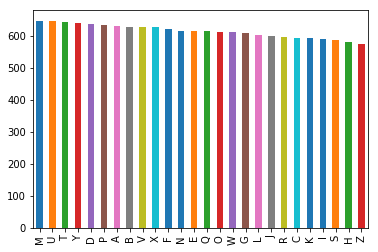

In [15]:
df_train['letter'].value_counts().plot.bar()

In [26]:
# Dropping the ID column from both our training and testing datasets as it is not necessary for our evaluation

df_train = df_train.drop('id', 1)


In [23]:
df_test = df_test.drop('id', 1)

In [24]:
df_train

,letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
5,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
6,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
7,J,2,2,4,4,2,10,6,2,6,12,4,8,1,6,1,7
8,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8
9,X,3,9,5,7,4,8,7,3,8,5,6,8,2,8,6,7


In [25]:
df_test.head()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,6,9,8,4,3,8,7,3,4,13,5,8,6,8,0,8
1,6,9,8,8,10,7,7,5,4,7,6,8,7,9,7,10
2,5,6,6,4,3,7,6,2,7,7,6,9,0,9,4,8
3,5,9,7,6,4,9,7,3,5,10,4,6,5,8,1,7
4,5,8,8,6,6,5,8,3,6,10,8,8,4,8,4,6


Data looks good and clean now. 

__Plotting histograms to see the attribute visualization__

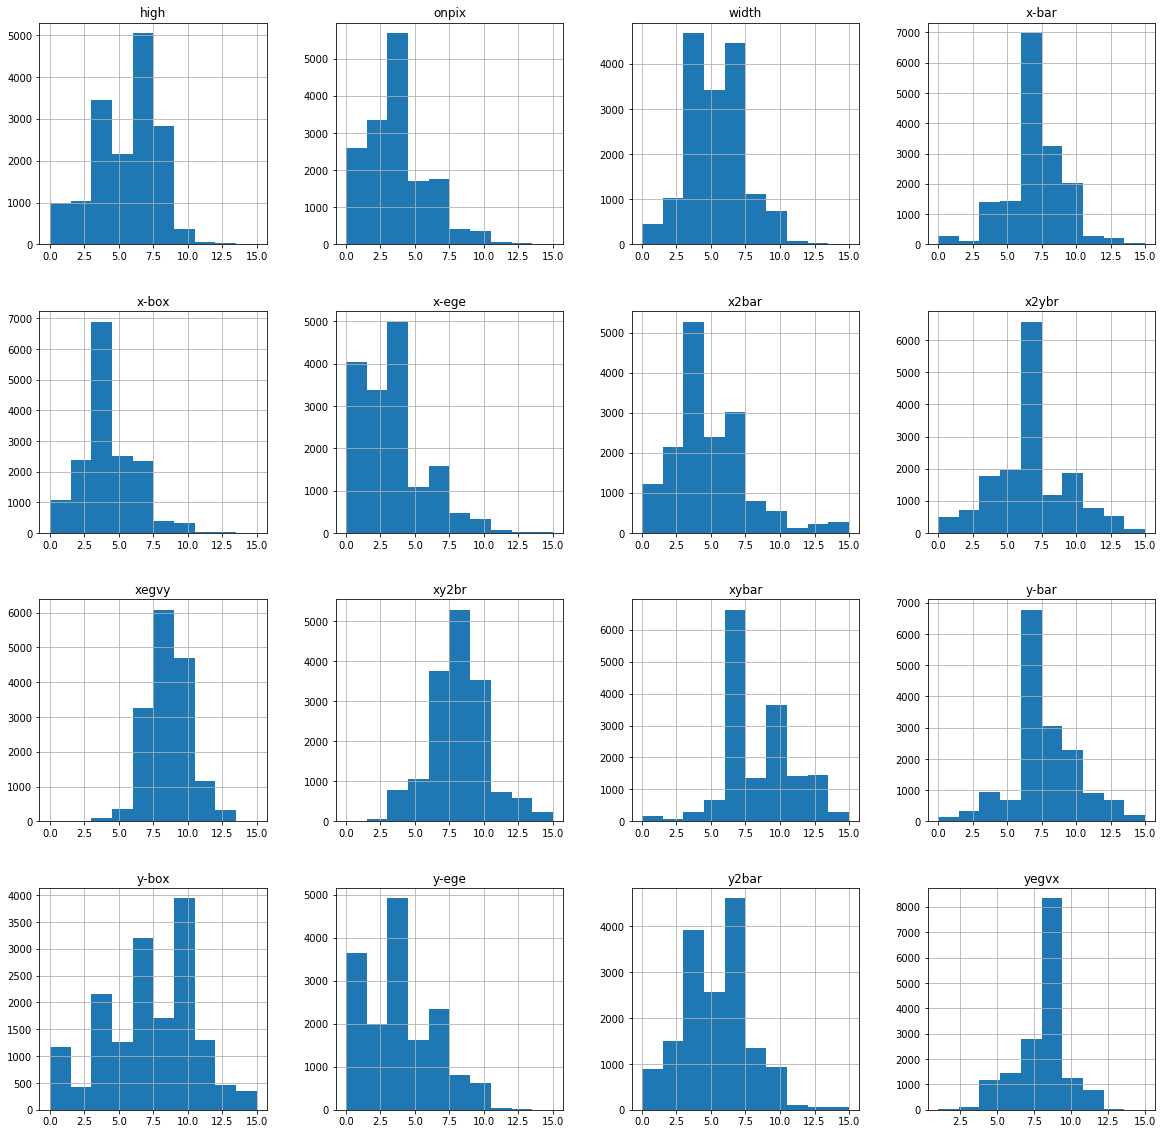

In [28]:
df_train.hist(figsize=[20,20])
plt.show()

__Creating X and y variables__

We have already removed the ID column from the training and testing Datasets. 

We will use the __y-variable__ to store the __letter__ column.

In [30]:
X = df_train.iloc[:,1:]
X.head()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7


In [31]:
X.shape

(16000, 16)

In [32]:
y = df_train.iloc[:,0]
y.head()

0    I
1    D
2    N
3    G
4    S
Name: letter, dtype: object

In [33]:
y.shape

(16000,)

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

We are splitting our data into 80:20 

## 4. Model Training

#### 4.1 Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=245,criterion='entropy',random_state=0,min_samples_split=2)

rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=245, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [45]:
y_pred=rfc.predict(X_test)

from sklearn.metrics import accuracy_score
ac= accuracy_score(y_test,y_pred)
print("Accuracy is :", ac*100)

Accuracy is : 96.21875


#### 4.2 KNN 

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='brute',n_neighbors =1 ,leaf_size=100,p=30)
knn.fit(X_train, y_train)

knn_predictions = knn.predict(X_test) 

acc=accuracy_score(y_test,knn_predictions)
print("Accuracy is :", acc*100)

Accuracy is : 94.5625


#### 4.3 XGBoost

In [57]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.1)

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy is : %.2f%%" % (accuracy * 100.0))

Accuracy is : 87.94%


#### 4.4 Support Vector Classifier

In [58]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf', C=1E01,tol=0.1)
svc.fit(X_train, y_train)
predicted= svc.predict(X_test)

In [60]:
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy = accuracy_score(y_test, predicted)
print("Accuracy is : %.2f%%" % (accuracy * 100.0))

Accuracy is : 97.28%


#### 4.5  Ensemble Learning 

_Model 1 : Random Forest Classifier , KNN , Support Vector Classifier_

In [61]:
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection

seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)

# create the sub models
estimators = []
model1 = RandomForestClassifier()
estimators.append(('rfc', model1))
model2 = KNeighborsClassifier()
estimators.append(('knn', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X_train, y_train, cv=kfold)
print(results.mean())

0.9590625000000002


In [62]:
ensemble.fit(X_train, y_train)
VotingClassifier_predictions = ensemble.predict(X_test) 

acc=accuracy_score(y_test,VotingClassifier_predictions)
print("Accuracy is :", acc*100)

Accuracy is : 96.125


_Model 2 : Random Forest Classifier , Support Vector Classifier_

In [63]:
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection

seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
# create the sub models
estimators = []
model1 = RandomForestClassifier()
estimators.append(('rfc', model1))
model2 = SVC()
estimators.append(('svm', model2))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X_train, y_train, cv=kfold)
print(results.mean())

0.9346874999999999


In [64]:
ensemble.fit(X_train, y_train)
VotingClassifier_predictions = ensemble.predict(X_test) 

acc=accuracy_score(y_test,VotingClassifier_predictions)
print("Accuracy is :", acc*100)

Accuracy is : 93.59375


__Algorithm Accuracy table__


Random Forest Classifier	: 96.21875

K-Nearest Neighbor	: 94.5625

XGBOOST	: 87.94

Support Vector Classifier	: 97.28

Ensemble - Model 1	: 96.125

Ensemble - Model 2	: 93.59375

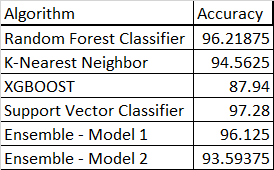

From the above accuracy table we can conclude that __Support Vector Classifer ( SVC )__ model gives the highest accuracy as far as the training data set is concerned. 

It is followed by __Random Forest Classifier ( RFC )__ model with an accuracy of 96.21% .

## 5. Test Dataset Predictions

In [65]:
df_test.head()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,6,9,8,4,3,8,7,3,4,13,5,8,6,8,0,8
1,6,9,8,8,10,7,7,5,4,7,6,8,7,9,7,10
2,5,6,6,4,3,7,6,2,7,7,6,9,0,9,4,8
3,5,9,7,6,4,9,7,3,5,10,4,6,5,8,1,7
4,5,8,8,6,6,5,8,3,6,10,8,8,4,8,4,6


In [66]:
X1 = df_test

In [67]:
X1.shape

(3999, 16)

#### 5.1 Support Vector Classifier

In [68]:
y_pred_svc = svc.predict(X1)
y_pred_svc

array(['N', 'V', 'I', ..., 'T', 'S', 'A'], dtype=object)

In [77]:
output_svc = pd.DataFrame(y_pred_svc, index=df_test.id, columns=['letter'])
output_svc.to_csv('output_svc.csv')

In [79]:
output_svc.head()

,letter
0,N
1,V
2,I
3,N
4,H


#### 5.2 Random Forest Classifier

In [80]:
y_pred_rfc = rfc.predict(X1)
y_pred_svc

array(['N', 'V', 'I', ..., 'T', 'S', 'A'], dtype=object)

In [82]:
output_rfc = pd.DataFrame(y_pred_rfc, index=df_test, columns=['letter'])
output_rfc.to_csv('output_rfc.csv')


## 6. Conclusion

Algorithm	Accuracy
Random Forest Classifier	96.21
K-Nearest Neighbor	94.56
XGBOOST	87.94
Support Vector Classifier	97.28
Ensemble - Model 1	96.12
Ensemble - Model 2	93.6
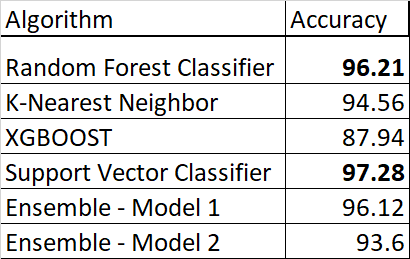

- We trained our model and predicted/recognized the letters with the help of test dataset.

- SVC Algorithm provides the maximum accuracy , followed by the RFC ( Random Forest Classifier ) Algorithm.

- We have verified the two output files output_svc and output_rfc. 

- Comparing the output files and calculating the difference, we found that __3825 records__ are predicted correctly out of the total 3999 (taking SVC model as reference).

